In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# Load the dataset
file_path = '/content/Traffic.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [6]:
# Check for missing values
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [20]:
# Display basic statistics
df_cleaned.describe()


,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,3.193548,68.696573,14.917339,15.279570,15.324933,114.218414,1.994624
std,8.945775,2.007090,45.850693,12.847518,14.341986,10.603833,60.190627,1.259307
min,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,8.000000,1.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1.000000
50%,16.000000,3.000000,64.000000,12.000000,12.000000,14.000000,109.000000,3.000000
75%,24.000000,5.000000,107.000000,22.000000,25.000000,23.000000,164.000000,3.000000
max,31.000000,6.000000,180.000000,70.000000,50.000000,40.000000,279.000000,3.000000


In [9]:
# Convert 'Time' column to datetime format
if df_cleaned['Time'].dtype == 'object':
   df_cleaned['Time'] = pd.to_datetime(df_cleaned['Time'], format='%I:%M:%S %p').dt.time

**Visualization 1: Traffic Situation Distribution**

<ipython-input-10-19f02b831bd5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Traffic Situation', palette='Set2')


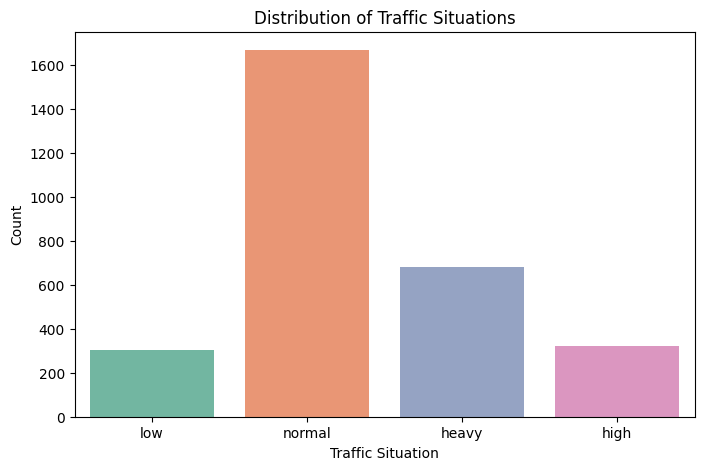

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_cleaned, x='Traffic Situation', palette='Set2')
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

**Average Vehicle Count by Type**

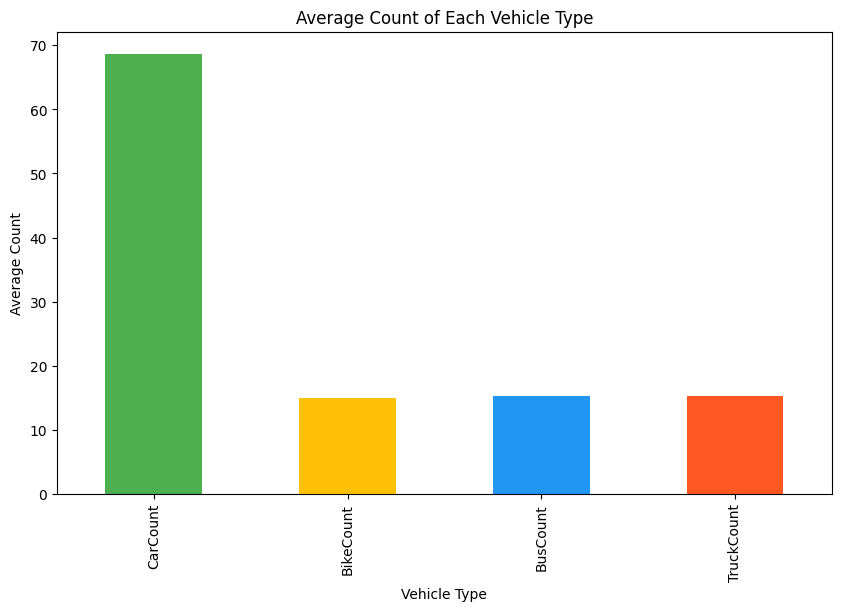

In [11]:
plt.figure(figsize=(10, 6))
vehicle_types = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount']
df_cleaned[vehicle_types].mean().plot(kind='bar', color=['#4CAF50', '#FFC107', '#2196F3', '#FF5722'])
plt.title('Average Count of Each Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Count')
plt.show()


**Total Traffic Throughout the Day**

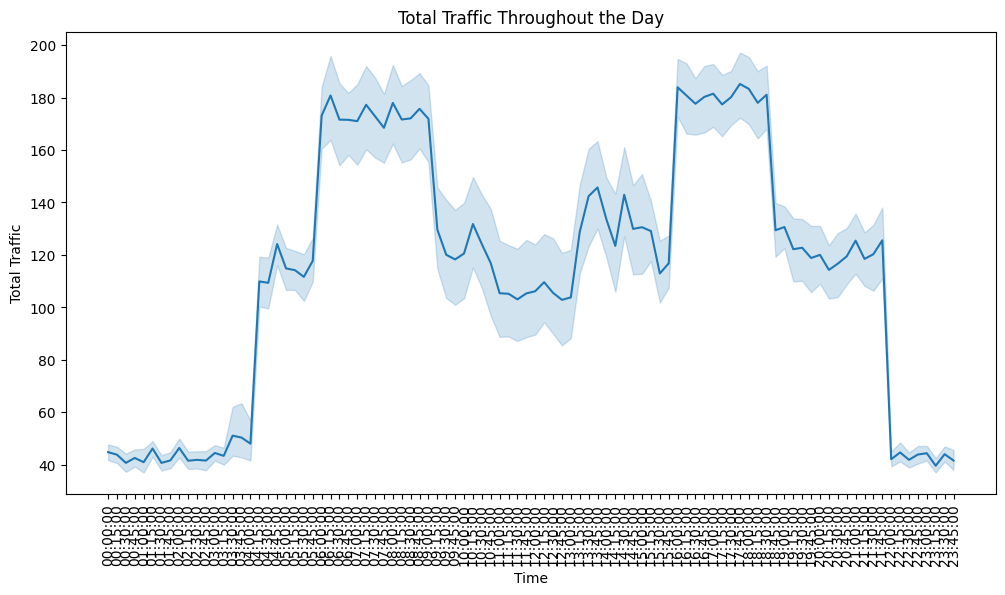

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_cleaned, x=df_cleaned['Time'].astype(str), y='Total')
plt.xticks(rotation=90)
plt.title('Total Traffic Throughout the Day')
plt.xlabel('Time')
plt.ylabel('Total Traffic')
plt.show()


**Heatmap of Correlation between Vehicle Counts and Total Traffic**

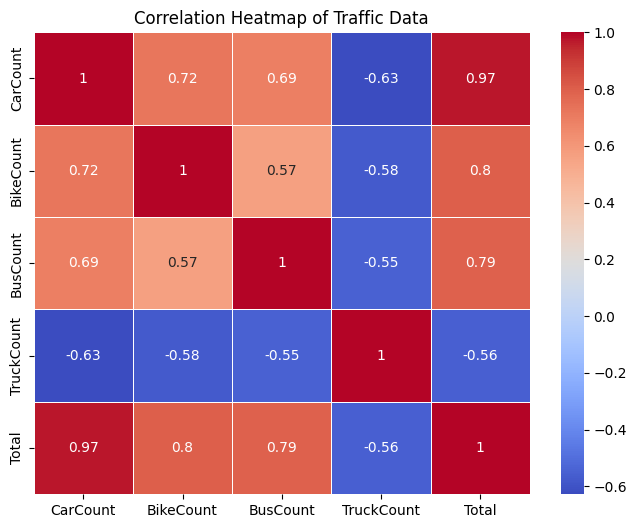

In [13]:
plt.figure(figsize=(8, 6))
corr_matrix = df_cleaned[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Traffic Data')
plt.show()

**Model Training and Prediction**

In [14]:
#Encode categorical variables ('Day of the week', 'Traffic Situation')
label_encoder_day = LabelEncoder()
label_encoder_situation = LabelEncoder()

df_cleaned['Day of the week'] = label_encoder_day.fit_transform(df_cleaned['Day of the week'])
df_cleaned['Traffic Situation'] = label_encoder_situation.fit_transform(df_cleaned['Traffic Situation'])

In [15]:
# Define features (X) and target (y)
X = df_cleaned[['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Day of the week']]
y = df_cleaned['Traffic Situation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [16]:
# Initialize and train the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy: 94.29%

Confusion Matrix:
 [[184   7   0   6]
 [  4  77   0   7]
 [  0   0  87   6]
 [  7  10   4 494]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       197
           1       0.82      0.88      0.85        88
           2       0.96      0.94      0.95        93
           3       0.96      0.96      0.96       515

    accuracy                           0.94       893
   macro avg       0.92      0.93      0.92       893
weighted avg       0.94      0.94      0.94       893



In [19]:
# Predict the traffic situation for new data (you can add any input data here)
new_data = [[45, 2, 5, 7, 2]]  # Example: [CarCount, BikeCount, BusCount, TruckCount, Day of the week (encoded)]
predicted_situation = clf.predict(new_data)

# Decode the predicted traffic situation
predicted_situation_label = label_encoder_situation.inverse_transform(predicted_situation)
print("Predicted Traffic Situation:", predicted_situation_label[0])

Predicted Traffic Situation: low


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
